In [1]:
import pandas as pd
import numpy as np

# Section 13: Data Formats and I/O

In this course thus far, we have read in all of our data in the CSV format. CSV is an excellent, organized way to read in data for use in Pandas. But it is not the only way, and there are multiple other options for reading in and outputting data. In fact, it would be a great idea to become familiar with these other formats as they are likely to be encountered by data analysts.

In this section we'll cover reading and writing the following:
* HTML
* JSON
* Excel
* Pickle

We'll also survey other data formats that Pandas supports.

## Reading JSON

**JSON**, or *Javascript Object Notation*, is a text-based interchange format that is widely used to communicate information between different applications that communicate over the internet. Many APIs use JSON to serve data.

JSON borrows heavily from JavaScript, but it is a standalone format that is supported by many languages including python.

* https://en.wikipedia.org/wiki/JSON

Let's take a look at an example at the following link: https://www.andybek.com/pandas-folks-json

This link takes us to a JSON object: 





```
{
  "name": ["Brian Dogood", "Leah Bokeh", "Mark Prescott", "Jurgen Gupta"],
  "salary": [64000, 73200, 76400, 94300],
  "occupation": [
    "Software Technician",
    "Data Scientist",
    "Business Consultant",
    "Aerospace Engineer"
  ]
}
```





This object is wrapped in curly braces, reminding us of Python dictionaries or JavaScript objects. And within those braces we have a series of key:value pairs describing the contents. In this case, we have names of individuals, their salaries, and their occupations. They are listed in respective order (*ordered lists*) within separate key:value pairs.

How do we read this into Pandas? Not surprisingly, it's not much different from reading CSVs. We simply call the `pd.read_json()` method!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html


In [2]:
pd.read_json('https://www.andybek.com/pandas-folks-json')

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


And voila, we have a dataframe! By now this should be incredibly familiar to us. Notice that each of the keys within the JSON is a column name, and the values are the data within each column. At this point, the format of the data that we read in is not longer important because we are now in Pandas.

Let's assign to a variable.

In [3]:
folks = pd.read_json('https://www.andybek.com/pandas-folks-json')

In [4]:
type(folks)

pandas.core.frame.DataFrame

In [5]:
folks.iloc[2]

name                Mark Prescott
salary                      76400
occupation    Business Consultant
Name: 2, dtype: object

## Reading HTML

HTML, or Hypertext Markup Language, is ubiquitous on the internet and is found everywhere on the web. HTML is the main markup language for web sites, which works alongside CSS, JS, and other backend services to present you with the websites that you visit.

* https://developer.mozilla.org/en-US/docs/Web/HTML

Much of the information on the web is available in the form of HTML tables, which contain information that you might be interested in reading in via Pandas.

Suppose we want to put together a dataframe of European countries and their populations. How would we do this?

Well, first we need to find a data source. As it happens, there's a Wikipedia article that shows all European countries with the data we want.
* https://en.wikipedia.org/wiki/List_of_European_countries_by_population

How do we read this into Pandas? It turns out that Pandas has the ability to read in data from HTML tables directly from a webpage. It recognizes HTML **table** classes. It uses the method `pd.read_html()`.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html



In [6]:
countries = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_countries_by_population')

Now we can treat it like a dataframe, right? Not so fast - what returns is not a dataframe, but instead a list of dataframes. Remember that you passed in an entire webpage to the `pd.read_html()` method, and so if the method encounters multiple tables to read, it needs a place to store those tables in an organized fashion. It uses a list for this task.

In [7]:
## Results in AttributeError: 'list' object has no attribute 'head'
# countries.head()

So now that we know we have a list of data frames, let's explore it a bit.

In [8]:
len(countries)

2

The `countries` variable is a list of two dataframes. The reason is that the webpage that we sent the method to actually has two tables - the table we're interested in, and a table of links to other webpages of interest.

So let's select the first dataframe from that list, as that's what we want.

In [9]:
countries[0]

Country.mw-parser-output .nobold{font-weight:normal}(or territory)  ...                             Source
   Country.mw-parser-output .nobold{font-weight:normal}(or territory)  ...                             Source
0                                   Russia * [Note 1]                  ...        National annual estimate[7]
1                                            Turkey *                  ...        National annual estimate[8]
2                                           Germany *                  ...     National quarterly estimate[9]
3                                   France * [Note 2]                  ...      National monthly estimate[10]
4                           United Kingdom * [Note 3]                  ...       National annual estimate[11]
5                                             Italy *                  ...      National monthly estimate[12]
6                                             Spain *                  ...              National estimate[13]
7                                  Ukraine * [Note 4]                  ...      National monthly estimate[14]
8                                            Poland *                  ...      National monthly estimate[15]
9                                           Romania *                  ...       National annual estimate[16]
10                                       Kazakhstan *                  ...              National estimate[17]
11                                      Netherlands *                  ...      National population clock[18]
12                                          Belgium *                  ...              National estimate[19]
13                                           Greece *                  ...              National estimate[20]
14                                   Czech Republic *                  ...    National quarterly estimate[21]
15                                           Sweden *                  ...      National monthly estimate[22]
16                                         Portugal *                  ...       National annual estimate[23]
17                                       Azerbaijan *                  ...              National estimate[24]
18                                          Hungary *                  ...       National annual estimate[25]
19                                          Belarus *                  ...    National quarterly estimate[26]
20                                          Austria *                  ...   Quarterly provisional figure[27]
21                                      Switzerland *                  ...    National provisional figure[28]
22                                         Bulgaria *                  ...              National estimate[29]
23                                  Serbia * [Note 5]                  ...       National annual estimate[30]
24                                          Denmark *                  ...    National quarterly estimate[31]
25                                          Finland *                  ...      Monthly national estimate[32]
26                                         Slovakia *                  ...              National estimate[33]
27                                           Norway *                  ...    National quarterly estimate[34]
28                                          Ireland *                  ...              National estimate[35]
29                                          Croatia *                  ...              National estimate[36]
30                                 Georgia * [Note 6]                  ...       National annual estimate[37]
31                           Bosnia and Herzegovina *                  ...              National estimate[38]
32                                          Armenia *                  ...       National annual estimate[39]
33                                          Albania *                  ...       National annual estimate[40]
34                                        L

Beautiful. In a single command, we brought the data over from a raw webpage and socked it into a Pandas dataframe that we're able to work with.

Now, this is not perfect. The data needs some cleanup:
* There's a lot of information that we don't care about, including Date and Region groupings
* The header appears to be duplicated, probably because some of the headers have subheaders

Let's start by fixing the header. We can do this within `pd.read_html()` method by specifying which row(s) to make as column headers.

In [10]:
countries = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_countries_by_population', header = 1)

In [11]:
countries[0].head()

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),UN estimate(2018)[5][6],Estimate,Date,Regionalgrouping,Source
0,Russia * [Note 1],145734038.0,146171015,1 Jan 2021,EAEU,National annual estimate[7]
1,Turkey *,82340088.0,83614362,31 Dec 2020,NaN,National annual estimate[8]
2,Germany *,83124418.0,83129285,30 Jun 2021,EU,National quarterly estimate[9]
3,France * [Note 2],64990511.0,67505000,1 Oct 2021,EU,National monthly estimate[10]
4,United Kingdom * [Note 3],67141684.0,67081234,30 Jun 2020,NaN,National annual estimate[11]


Much better. Now let's remove the columns that we don't care about. We can do this with label-based indexing.

In [12]:
countries[0].loc[:, ['Country.mw-parser-output .nobold{font-weight:normal}(or territory)', 'Estimate']]

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234
5,Italy *,59097904
6,Spain *,47394223
7,Ukraine * [Note 4],41319838
8,Poland *,38151000
9,Romania *,19186000


Let's now reassign our `countries` variable to be this dataframe.

In [13]:
countries = countries[0].loc[:, ['Country.mw-parser-output .nobold{font-weight:normal}(or territory)', 'Estimate']]

In [14]:
countries.head()

,Country.mw-parser-output .nobold{font-weight:normal}(or territory),Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234


And let's rename that horrible Country column to something more readable, like "Country". We can do this using the `rename()` method.

In [15]:
countries.rename(columns = {'Country.mw-parser-output .nobold{font-weight:normal}(or territory)':'Country'}, inplace = True)

In [16]:
countries.head()

,Country,Estimate
0,Russia * [Note 1],146171015
1,Turkey *,83614362
2,Germany *,83129285
3,France * [Note 2],67505000
4,United Kingdom * [Note 3],67081234


That's better. But the countries also have some notes and asterisks that served as hyperlinks in the original page. We should get rid of those using regex and replacement!

In [17]:
countries = countries.replace(r'\[.+\]', '', regex = True).replace(r'\*', '', regex = True)

In [18]:
countries.head(20)

,Country,Estimate
0,Russia,146171015
1,Turkey,83614362
2,Germany,83129285
3,France,67505000
4,United Kingdom,67081234
5,Italy,59097904
6,Spain,47394223
7,Ukraine,41319838
8,Poland,38151000
9,Romania,19186000


Awesome. We now have clear country names and associated population estimates. So from a few simple commands, we went from a table in HTML to a Pandas data ready to be analyzed.

Let's create a quick bar chart of the 10 largest European countries by population. We'll first need to set the index as the "Country", then we can call `plot()`. Also, for stylistic purposes we'll import pyplot and use the `ggplot` style.

In [19]:
from matplotlib import pyplot as plt

In [20]:
plt.style.use('ggplot')

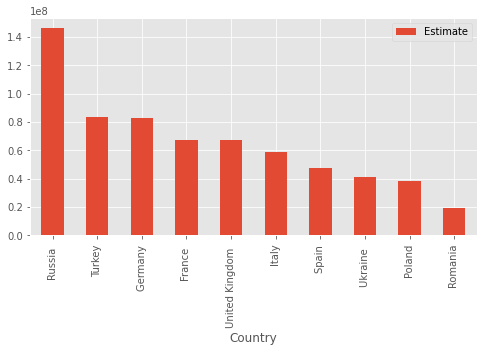

In [21]:
countries.set_index("Country").head(10).plot(kind = 'bar', figsize = (8, 4))

## Reading Excel

Microsoft Excel is a popular format for data. Excel spreadsheets consist of a grid of cells arranged in numbered rows and lettered columns. The default formats for Excel spreadsheets are:
* .xls -> binary format
* .xlsx -> xml-based (newer)

Keeping with the theme of this section, Pandas can read Excel files using a method called `read_excel()`.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [22]:
pd.read_excel('https://andybek.com/folks.xlsx')

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


Check that out. We've read in an xlsx file and now we have a Pandas dataframe that's ready to go. 

But wait a second! That xlsx file contains *multiple* worksheets, and we only got one of them as a dataframe. How do we get the others?

If we're interested in other tabs (worksheets) within an Excel file, we can go into the method and specify the sheets.

In [23]:
pd.read_excel('https://andybek.com/folks.xlsx', sheet_name = 'hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


As an alternative syntax, we can drop the parameter name and use its index position instead.
* Like Python and Pandas, Excel worksheets follow zero-based indexing.

In [24]:
pd.read_excel('https://andybek.com/folks.xlsx', 1)

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


Under the hood, Pandas uses several libraries to read and write Excel files and do other tasks. For Pandas there are several optional dependencies required for only for particular tasks. Thankfully, these packages come standard with most data science distributions, including the Google Colaboratory.

Specifically for Excel, the **xlrd**, **xlwt**, and **openpyxl** packages are used by Pandas under the hood when working with Excel files.
* https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html#optional-dependencies

It's also worth mentioning that for reading in HTML tables, Pandas relies on such packages as **BeautifulSoup**.

In [25]:
!pip show xlrd

Name: xlrd
Version: 1.1.0
Summary: Library for developers to extract data from Microsoft Excel (tm) spreadsheet files
Home-page: http://www.python-excel.org/
Author: John Machin
Author-email: sjmachin@lexicon.net
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: 


## Creating Output: The `to_*` Family of Methods

We've explored the input side of I/O, covering JSON, HTML, and Excel. These methods share a lot of similar syntax.

After we do work on our data, we are often interested in exporting the data in other formats. Fortunately, this is about as easy as reading it in, especially if you've done a good job cleaning and transforming said data.

Let's begin by reading in the second worksheet of the `folks` Excel workbook, which was called "hobbies".

In [26]:
pd.read_excel('https://andybek.com/folks.xlsx', sheet_name = 'hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


Nice. Let's assign it to a Python variable `hobbies`.

In [27]:
hobbies = pd.read_excel('https://andybek.com/folks.xlsx', sheet_name = 'hobbies')

Suppose our goal is to add a new person to this dataframe, with a new hobby, and then output the resulting dataframe to a CSV file.

Let's start with the insertion, which we'll do by *setting by enlargement*.

In [28]:
hobbies.loc[4] = ["Zoltan Zachary", "Archery"]

In [29]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing
4,Zoltan Zachary,Archery


Let's also add a column for "Age". We can do that using numpy.
* https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

In [30]:
hobbies['age'] = np.random.uniform(22, 54, 5)

In [31]:
hobbies

,name,hobby,age
0,Brian Dogood,Fishing,42.988060
1,Leah Bokeh,Skateboarding,43.310549
2,Mark Prescott,Value Investing,24.355345
3,Jurgen Gupta,Drawing,52.366281
4,Zoltan Zachary,Archery,27.896011


Thus, we started with a dataframe of four people and four hobbies, and after some manipulation in Pandas, we end with a dataframe with five people, their hobbies, and their ages. 

For every `read` method in Pandas, there is a corresponding `write` method. Specifically, we have:
* `to_csv()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
* `to_excel()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html
* `to_html()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_html.html
* `to_json()`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

Let's output this to a CSV

In [32]:
hobbies.to_csv()

',name,hobby,age\n0,Brian Dogood,Fishing,42.98805957474741\n1,Leah Bokeh,Skateboarding,43.31054944654117\n2,Mark Prescott,Value Investing,24.35534497796891\n3,Jurgen Gupta,Drawing,52.366280513675164\n4,Zoltan Zachary,Archery,27.896011435444684\n'

This returns a long sting of comma-separated data, which is exactly what a CSV is. In this case, the CSV is being printed into the notebook. If we want to write it to a file, we just need to specify a file name and file path.

In [33]:
hobbies.to_csv('hobbies.csv')

By default, the file will output to your local working directory.

In [34]:
!ls

hobbies.csv  hobbies.json  my_stock  sample_data


After having saved our file, we can turn around and read it back into Pandas! In this case, we don't need to use a URL because the file is present in our current working directory.

In [35]:
pd.read_csv('hobbies.csv')

,Unnamed: 0,name,hobby,age
0,0,Brian Dogood,Fishing,42.988060
1,1,Leah Bokeh,Skateboarding,43.310549
2,2,Mark Prescott,Value Investing,24.355345
3,3,Jurgen Gupta,Drawing,52.366281
4,4,Zoltan Zachary,Archery,27.896011


Sure enough, Pandas pulls the data and reads it locally. Notice however that the index has been imported, resulting in a duplicated index. There are multiple ways to fix this, but perhaps the best way is to specify `index = False` in the `to_csv()` method call.

In [36]:
hobbies.to_csv('hobbies.csv', index = False)

In [37]:
pd.read_csv('hobbies.csv')

,name,hobby,age
0,Brian Dogood,Fishing,42.988060
1,Leah Bokeh,Skateboarding,43.310549
2,Mark Prescott,Value Investing,24.355345
3,Jurgen Gupta,Drawing,52.366281
4,Zoltan Zachary,Archery,27.896011


Much better! So, we've read in an Excel workbook, modified it, and output it as a CSV. But we can also output to other methods!

How about JSON? Let's do that.

In [38]:
hobbies.to_json('hobbies.json')

In [39]:
!ls

hobbies.csv  hobbies.json  my_stock  sample_data


We can get even fancier and save our hobbies dataframe to HTML! It actually creates a cute lil' website for us, if you will. Let's take a look at the text output first.

In [40]:
hobbies.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>name</th>\n      <th>hobby</th>\n      <th>age</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Brian Dogood</td>\n      <td>Fishing</td>\n      <td>42.988060</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Leah Bokeh</td>\n      <td>Skateboarding</td>\n      <td>43.310549</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mark Prescott</td>\n      <td>Value Investing</td>\n      <td>24.355345</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Jurgen Gupta</td>\n      <td>Drawing</td>\n      <td>52.366281</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Zoltan Zachary</td>\n      <td>Archery</td>\n      <td>27.896011</td>\n    </tr>\n  </tbody>\n</table>'

What's returned is HTML code that's needed to construct the table in HTML. If you were to copy and paste this code in to an HTML file, you'll actually get an HTML table (check it out at http://codepen.io).
Pretty neat, and we didn't even have to do anything. This is hard to read, so maybe we can print it out as well

In [41]:
print(hobbies.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>hobby</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Brian Dogood</td>
      <td>Fishing</td>
      <td>42.988060</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Leah Bokeh</td>
      <td>Skateboarding</td>
      <td>43.310549</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Mark Prescott</td>
      <td>Value Investing</td>
      <td>24.355345</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Jurgen Gupta</td>
      <td>Drawing</td>
      <td>52.366281</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Zoltan Zachary</td>
      <td>Archery</td>
      <td>27.896011</td>
    </tr>
  </tbody>
</table>


## Bonus: Introduction to Pickling

The process of **serialization** involves converting ojbects into bytes, which can be stored or transmitted over a network.

**Pickle** is the Python standard library module that is responsible for serialization.

https://docs.python.org/3/library/pickle.html

Consider the following Python dictionary.

In [42]:
googl = {'ticker':'GOOGL', 'shares': 10, 'book_cost': 1540.23}

Suppose we wanted to send this exact object to friend in a way that allows them to recover this exact structure. One way is to save the whole notebook or Python file, but this is overhead-heavy.

Instead, we can serialize only this Python object, ensuring that its exact structure and content is captured and converted to a stream of bytes, allowing someone to restore the object at a later time. In Python, object serialization is called **pickling**.


In [43]:
import pickle

First we have to instantiate a file that will hold the object in memory. We'll use the `open()` command and pass in a filename as well as the keyword to write binary, "wb".

In [44]:
pickle_output = open('my_stock', 'wb')

Now we'll dump our object into this file.

In [45]:
pickle.dump(googl, pickle_output)

Finally, we need to close the file to tell Python we are done with it.

In [46]:
pickle_output.close()

Let's check to make sure that our new file is there.

In [47]:
!ls

hobbies.csv  hobbies.json  my_stock  sample_data


Now, how do we bring it back into a Python object that's readable? We start by using the `open()` function again, but this time we'll pass in the command to read instead of to write.

In [48]:
pickle_input = open('my_stock', 'rb')

Now we'll use the pickle `load()` method in the Pickle module to load it back into a Python dictionary.

In [49]:
stock_dict = pickle.load(pickle_input)

And now let's have a looksie:

In [50]:
stock_dict

{'book_cost': 1540.23, 'shares': 10, 'ticker': 'GOOGL'}

Nice, we got it all back. What did this object look like when it was pickled? Let's have a look.

In [51]:
!hexdump my_stock

0000000 0380 717d 2800 0658 0000 7400 6369 656b
0000010 7172 5801 0005 0000 4f47 474f 714c 5802
0000020 0006 0000 6873 7261 7365 0371 0a4b 0958
0000030 0000 6200 6f6f 5f6b 6f63 7473 0471 4047
0000040 1098 85eb b81e 7552 002e               
0000049


To summarize, the `pickle` library is used to serialize and de-serialize objects in Python. It does NOT compress files -it merely transforms data from one representation to another.

## Pickles in Pandas

Pandas plays very nicely with the Python pickle. You are able to pickle Pandas series and dataframes!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_pickle.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_pickle.html

The instructor has prepared a pickled dataframe for us to use in this lecture. https://andybek.com/portfolio

We can easily read pickles into Pandas by using the `read_pickle()` method.

In [52]:
pd.read_pickle('https://andybek.com/portfolio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


Look at that, we've got ourselves a dataframe. Let's assign it to a variable.

In [53]:
folio = pd.read_pickle('https://andybek.com/portfolio')

Similarly, we can create a pickle out of a dataframe using the `to_pickle()` method. All we need to do is pass in the object. 

In [54]:
folio.to_pickle('folio')

Did it work? let's check our working directory.

In [55]:
!ls

folio  hobbies.csv  hobbies.json  my_stock  sample_data


Let's read it back in again! Note that this file is available locally, so we don't need to (and we should not) access it via the URL.

In [57]:
pd.read_pickle('folio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


Important note: generally speaking, you should not load pickles that you receive from untrusted sources. Such pickles may contain malicious code that may execute immediately after it's unpickled. So be careful when working with pickles.

That said, pickling is very useful in the data community, for example in storing trained machine learning algorithms. But because they are specific to Python and come with security concerns, pickles are not too commonly used for data interchange. That's in contrast to something like JSON, which is much more transparent, readable, and interchangable between different languages.

## The Many Other Formats

In addition to CSV, Excel, JSON, Pickles, and HTML, Pandas also supports many other formats that it can read in and write to. 

These can be viewed in the IO tools documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

It is likely that new file formats will be added as Pandas continues to develop. However, the paradigm for reading and writing files is very likely to remain the same. It will consist of reader methods and writer methods. 

## Skill Challenge

#### 1. Go to https://andybek.com/traders, where you'll find a page listing trader positions and some attributes. Using Pandas, read this table directly into a Pandas dataframe. Assign the dataframe to the variable *positions*.

This is an HTML table, so we'll use the `read_html()` method to read in this data.

In [67]:
pd.read_html('https://andybek.com/traders')

[  TraderID    Instrument   Amount Trader Location
 0   MCBIRN     02079K107   150000              EU
 1    WISEA     1350Z74U5  6400000              EU
 2    IACOP  GB00B3KJDQ49  2430000              US]

But wait a minute! Remember that what's returned is a list of dataframes, not a dataframe. There is only one dataframe in this particular list, so to access it we can use the indexer at postiion 0.

In [68]:
pd.read_html('https://andybek.com/traders')[0]

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


Cool, let's save it to the variable *positions*.

In [69]:
positions = pd.read_html('https://andybek.com/traders')[0]

In [70]:
positions

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


#### 2. The positions that we imported above contain trader aliases (IDs). But over at https://andybek.com/pandas-traders-names, we have mroe information on the name and seniority of each trader. Determine the data format served at this URL, and then read it into a Pandas dataframe called `traders`.

If we had over to the URL, we see that this data is in JSON format.



```
{
  "names": ["Shylah McBirney", "Allen Wise", "Iacopo Brivio", "Allison Carter"],
  "alias": ["MCBIRN", "WISEA", "IACOP", "CARTERA"],
  "seniority": ["Executive", "Executive", "Junior", "Mid-level"]
}
```



Therefore, we'll use the `pd.read_json()` import method.

In [71]:
pd.read_json('https://andybek.com/pandas-traders-names')

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


Great! Let's save that as `traders`.

In [72]:
traders = pd.read_json('https://andybek.com/pandas-traders-names')

In [73]:
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


We now have a table of the individuals' names, aliases, and seniority.

#### 3. Combine the `positions` and `traders` dataframes to produce a dataframe that contains the position details as well as the full name and seniority of each trader.

Simple enough. We will use the `merge()` function in Pandas to merge these two dataframes together! The two frames share the "alias"/"TraderID" columns in terms of information. We can merge on these columns. But note that the columns are labeled differently in the two dataframes. For that reason we'll need to invoke the `left_on` and `right_on` parameters.

In [74]:
positions.merge(traders, left_on = 'TraderID', right_on = 'alias')

,TraderID,Instrument,Amount,Trader Location,names,alias,seniority
0,MCBIRN,02079K107,150000,EU,Shylah McBirney,MCBIRN,Executive
1,WISEA,1350Z74U5,6400000,EU,Allen Wise,WISEA,Executive
2,IACOP,GB00B3KJDQ49,2430000,US,Iacopo Brivio,IACOP,Junior


Notice that we've lost one member of the `traders` dataframe, Allison Carter, because she was not included in the `positions` dataframe and we performed an *inner* join. Also notice that the column that we merged on is duplicated. Best practice would be to drop one of these columns to avoid repitition.

#### 4. Save the merged dataframe from the previous step into a pickle file called `pickled_positions` as well as to a CSV file called `positions.csv`. Confirm that the files have been saved locally.

We can accomplish this using the `to_pickle()` and `to_csv()` commands as follows:




In [75]:
positions.merge(traders, left_on = 'TraderID', right_on = 'alias').to_pickle('picked_positions')

In [76]:
positions.merge(traders, left_on = 'TraderID', right_on = 'alias').to_csv('positions.csv')

Let's check if the files were written.

In [77]:
!ls

folio	     hobbies.json  picked_positions  sample_data
hobbies.csv  my_stock	   positions.csv


Success!

Since we're in Google colaboratory, how would we get these files onto our local computer? 

## BONUS: Downloading files from Google Colab

Writing files locally when using the colab only writes them to the colab location - it does not write the files to the local computer. To do this, we need to use the `files` module in teh `google.colab` library.

In [78]:
from google.colab import files

Next, we use the `files.download()` method to download the file. This will launch a download prompt that you can then use to download the file onto your computer.

In [79]:
files.download('positions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>